In [1]:
import cmlreaders as cml
import mne
import numpy as np
import pandas as pd
pd.options.display.max_columns=None
import os
from scipy.io import loadmat
from ScalpBIDSConverter import *

%matplotlib inline

/home1/jrudoler/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
peers1_subjects = [
'LTP063', 'LTP064', 'LTP065', 'LTP066', 'LTP067', 'LTP069', 'LTP070', 'LTP073',
'LTP074', 'LTP075', 'LTP076', 'LTP077', 'LTP079', 'LTP081', 'LTP082', 'LTP084',
'LTP085', 'LTP086', 'LTP087', 'LTP088', 'LTP089', 'LTP090', 'LTP091', 'LTP092', 
'LTP093', 'LTP094', 'LTP095', 'LTP096', 'LTP098', 'LTP099', 'LTP100', 'LTP101', 
'LTP102', 'LTP103', 'LTP104', 'LTP105', 'LTP106', 'LTP107', 'LTP108', 'LTP110', 
'LTP111', 'LTP112', 'LTP113', 'LTP114', 'LTP115', 'LTP117', 'LTP118', 'LTP119', 
'LTP120', 'LTP122', 'LTP123', 'LTP124', 'LTP125', 'LTP127', 'LTP128', 'LTP130', 
'LTP131', 'LTP132', 'LTP133', 'LTP134', 'LTP135', 'LTP136', 'LTP137', 'LTP138', 
'LTP139', 'LTP140', 'LTP141', 'LTP142', 'LTP143', 'LTP144', 'LTP145', 'LTP146',
'LTP147', 'LTP148', 'LTP149', 'LTP150', 'LTP151', 'LTP153', 'LTP155', 'LTP159',
'LTP166', 'LTP168', 'LTP174', 'LTP184', 'LTP185', 'LTP186', 'LTP187', 'LTP188',
'LTP189', 'LTP190', 'LTP191', 'LTP192', 'LTP193', 'LTP194', 'LTP195', 'LTP196', 
'LTP197', 'LTP198', 'LTP199', 'LTP200', 'LTP201', 'LTP202', 'LTP207', 'LTP209', 
'LTP210', 'LTP211', 'LTP212', 'LTP214', 'LTP215', 'LTP227', 'LTP228', 'LTP229', 
'LTP230', 'LTP231', 'LTP232', 'LTP233', 'LTP234', 'LTP235', 'LTP236', 'LTP237', 
'LTP238', 'LTP239', 'LTP240', 'LTP241', 'LTP242', 'LTP243', 'LTP244', 'LTP245', 
'LTP246', 'LTP247', 'LTP249', 'LTP250', 'LTP251', 'LTP252', 'LTP253', 'LTP254', 
'LTP256', 'LTP258', 'LTP259', 'LTP260', 'LTP261', 'LTP263', 'LTP264', 'LTP265',
'LTP267', 'LTP268', 'LTP269', 'LTP270', 'LTP271', 'LTP272', 'LTP273', 'LTP274', 
'LTP275', 'LTP276', 'LTP277', 'LTP278', 'LTP279', 'LTP280', 'LTP281', 'LTP282', 
'LTP283', 'LTP284', 'LTP285', 'LTP286', 'LTP287', 'LTP288', 'LTP289', 'LTP290', 
'LTP291', 'LTP292', 'LTP293', 'LTP294'
]
np.savetxt("ltpFR_subjects.txt", peers1_subjects, fmt="%s")

In [ ]:
%%time
converter = ScalpBIDSConverter("LTP184", "ltpFR", 13,
                               root="/home1/jrudoler/bids/", overwrite_beh=True, overwrite_eeg=False)

['/data7/eeg/scalp/ltp/ltpFR/LTP184/session_13/eeg/LTP184 20120420 1248.2.raw'
 '/data7/eeg/scalp/ltp/ltpFR/LTP184/session_13/eeg/LTP184 20120420 1248.2.raw.bz2']
/data7/eeg/scalp/ltp/ltpFR/LTP184/session_13/eeg/LTP184 20120420 1248.2.raw
Reading EGI header from /data7/eeg/scalp/ltp/ltpFR/LTP184/session_13/eeg/LTP184 20120420 1248.2.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {D254, sync} ...
Reading 0 ... 2357788  =      0.000 ...  4715.576 secs...


## Main code

In [2]:
def convert_to_bids(subject, experiment, session):
#     if os.path.exists(f"/data8/PEERS_BIDS/sub-{subject}/ses-{session}/eeg/sub-{subject}_ses-{session}_task-{experiment}_eeg.edf"):
#         return True
    converter = ScalpBIDSConverter(subject, experiment, session, root="/data8/PEERS_BIDS/",
                                   overwrite_eeg=False, overwrite_beh=True, )
    return True

In [3]:
data = pd.read_csv("/home1/jrudoler/bids-convert/peers_sessions.csv")

In [4]:
import cmldask.CMLDask as da
client = da.new_dask_client_slurm(
    job_name="bids_convert",
    memory_per_job="20GB",
    max_n_jobs=40, threads_per_job=1, 
    adapt=True,
    log_directory="/home1/jrudoler/logs/",
)

Unique port for jrudoler is 51360
{'dashboard_address': ':51360'}
To view the dashboard, run: 
`ssh -fN jrudoler@rhino2.psych.upenn.edu -L 8000:192.168.86.134:51360` in your local computer's terminal (NOT rhino) 
and then navigate to localhost:8000 in your browser


In [5]:
futures = client.map(convert_to_bids, data['subject'], data['experiment'], data["session"])

In [15]:
unfinished_business = data[np.array([f.status=='error' for f in futures])]
unfinished_business.to_csv("unfinished_business.csv", index=False)

In [6]:
exceptions = da.get_exceptions(futures, data['experiment'])

In [13]:
da.print_traceback(exceptions.iloc[0:1], 'ltpFR')

  File "/tmp/ipykernel_94861/346964087.py", line 4, in convert_to_bids
    converter = ScalpBIDSConverter(subject, experiment, session, root="/data8/PEERS_BIDS/",
  File "/home1/jrudoler/bids-convert/ScalpBIDSConverter.py", line 45, in __init__
    self.write_bids_eeg(temp_path=f"/home1/jrudoler/.temp/{int(time.time()*100)}_temp.edf",
  File "/home1/jrudoler/bids-convert/ScalpBIDSConverter.py", line 332, in write_bids_eeg
    mne_bids.write_raw_bids(
  File "<decorator-gen-593>", line 24, in write_raw_bids
  File "/home1/jrudoler/.local/lib/python3.8/site-packages/mne_bids/write.py", line 1665, in write_raw_bids
    _sidecar_json(raw, task=bids_path.task, manufacturer=manufacturer,
  File "/home1/jrudoler/.local/lib/python3.8/site-packages/mne_bids/write.py", line 880, in _sidecar_json
    _write_json(fname, ch_info_json, overwrite)
  File "/home1/jrudoler/.local/lib/python3.8/site-packages/mne_bids/utils.py", line 191, in _write_json
    raise FileExistsError(f'"{fname}" already exist

In [8]:
exceptions['exception'].iloc[0]

'FileExistsError(\'"/data8/PEERS_BIDS/sub-LTP063/ses-0/eeg/sub-LTP063_ses-0_task-ltpFR_eeg.json" already exists. Please set overwrite to True.\')'

In [14]:
client.cancel(futures)

In [13]:
scalp_data = cml.get_data_index("ltp").query("experiment in ['ltpFR', 'ltpFR2', 'VFFR']")
scalp_data = scalp_data[~scalp_data['all_events'].isna()]
scalp_data = scalp_data[scalp_data['subject'].apply(len)==6]

In [4]:
scalp_data[["subject", "experiment", "session"]].to_csv("peers_sessions.csv", index=False)

In [11]:
def check_eeg(subject, experiment, session):
    return os.path.exists(f"/data8/PEERS_BIDS/sub-{subject}/ses-{session}/eeg/sub-{subject}_ses-{session}_task-{experiment}_eeg.edf") | \
            os.path.exists(f"/data8/PEERS_BIDS/sub-{subject}/ses-{session}/eeg/sub-{subject}_ses-{session}_task-{experiment}_eeg.bdf")
def check_beh(subject, experiment, session):
    return os.path.exists(f"/data8/PEERS_BIDS/sub-{subject}/ses-{session}/beh/sub-{subject}_ses-{session}_task-{experiment}_events.tsv") & \
            os.path.exists(f"/data8/PEERS_BIDS/sub-{subject}/ses-{session}/beh/sub-{subject}_ses-{session}_task-{experiment}_events.json")

def check_correct_montage(subject, experiment, session):
    return os.path.exists(f"/data8/PEERS_BIDS/sub-{subject}/ses-{session}/eeg/sub-{subject}_ses-{session}_space-CapTrak_electrodes.tsv")
check_eeg = np.vectorize(check_eeg)
check_beh = np.vectorize(check_beh)
check_correct_montage = np.vectorize(check_correct_montage)

In [14]:
scalp_data["eeg"] = check_eeg(scalp_data["subject"], scalp_data["experiment"], scalp_data["session"])
scalp_data["beh"] = check_beh(scalp_data["subject"], scalp_data["experiment"], scalp_data["session"])
scalp_data["mon"] = check_correct_montage(scalp_data["subject"], scalp_data["experiment"], scalp_data["session"])
scalp_data = scalp_data[["subject", "experiment", "session", "beh", "eeg", "mon"]]

In [17]:
scalp_data.query("eeg and ~beh")

,subject,experiment,session,beh,eeg,mon


In [22]:
scalp_data.query("eeg and ~mon")

,subject,experiment,session,beh,eeg,mon


In [15]:
error_sessions = scalp_data.query("eeg and ~mon")
convert_futures = client.map(convert_to_bids, error_sessions["subject"], error_sessions["experiment"], error_sessions["session"])

In [17]:
error_sessions.reset_index(drop=True).iloc[error_df.index.values]

,subject,experiment,session,beh,eeg,mon
6,LTP361,ltpFR2,9,True,True,False


In [16]:
error_df = da.get_exceptions(convert_futures, range(len(error_sessions)))
error_df

/home1/jrudoler/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,exception,traceback_obj
param,,
6,"MemoryError((144, 11153408), dtype('float64'))",<traceback object at 0x2b9b1ccd5e40>


In [25]:
da.print_traceback(error_df, 34)

  File "/tmp/3077809.1.jupyter.q/ipykernel_109816/657057374.py", line 6, in convert_to_bids
    converter = ScalpBIDSConverter(subject, experiment, session, root="/data8/PEERS_BIDS/", overwrite_eeg=True, overwrite_beh=True)
  File "/home1/jrudoler/bids-convert/ScalpBIDSConverter.py", line 40, in __init__
    self.set_montage()
  File "/home1/jrudoler/bids-convert/ScalpBIDSConverter.py", line 93, in set_montage
    self.raw_file.set_montage('biosemi128')
  File "<decorator-gen-24>", line 24, in set_montage
  File "/home1/jrudoler/anaconda3/envs/py38/lib/python3.8/site-packages/mne/io/meas_info.py", line 184, in set_montage
    _set_montage(info, montage, match_case, match_alias, on_missing)
  File "/home1/jrudoler/anaconda3/envs/py38/lib/python3.8/site-packages/mne/channels/montage.py", line 1031, in _set_montage
    _on_missing(on_missing, missing_coord_msg)
  File "/home1/jrudoler/anaconda3/envs/py38/lib/python3.8/site-packages/mne/utils/check.py", line 811, in _on_missing
    raise e

In [2]:
import glob
import os

In [11]:
files_to_delete = glob.glob("/data8/PEERS_BIDS/sub-*/ses-*/beh/*_events.*")

In [10]:
for f in files_to_delete:
    os.remove(f)

## Events

In [60]:
peers4_events = cml.CMLReader.load_events(experiments=["VFFR"])

FileNotFoundError: Unable to find the requested file in any of the expected locations:
 /protocols/ltp/subjects/LTP326/experiments/ltpFR2/sessions/19/behavioral/current_processed/all_events.json
/data/events/pyFR/LTP326_None_events.mat

In [90]:
peers1_events.groupby("subject").agg({"session":"nunique"})

,session
subject,
LTP063,20
LTP064,20
LTP065,20
LTP066,20
LTP067,20
LTP068,5
LTP069,20
LTP070,20
LTP073,20


In [8]:
events = cml.CMLReader.load_events("LTP400", "VFFR")

In [12]:
events.sort_values("type")['type'].unique()

array(['BREAK_START', 'BREAK_STOP', 'COUNTDOWN', 'FFR_REC_WORD',
       'FFR_START', 'FFR_STOP', 'PRACTICE_REC_START', 'PRACTICE_REC_STOP',
       'PRACTICE_REC_WORD', 'PRACTICE_REC_WORD_VV', 'PRACTICE_WORD',
       'PRACTICE_WORD_OFF', 'REC_START', 'REC_STOP', 'REC_WORD',
       'REC_WORD_VV', 'SESS_END', 'SESS_START', 'WORD', 'WORD_OFF'],
      dtype=object)

In [59]:
events[events['resp']>1]

,answer,case,color_b,color_g,color_r,distractor,eegfile,eegoffset,eogArtifact,experiment,final_distractor,final_math_correct,finalrecalled,font,intruded,intrusion,iscorrect,item_name,item_num,list,listtype,math_correct,montage,msoffset,mstime,phase,protocol,recalled,recog_conf,recog_resp,recog_rt,recognized,rectime,rej_time,rejected,resp,rt,serialpos,session,studytrial,subject,task,test,trial,type
101,NaN,upper,1,0.412842,0.577637,0,/protocols/ltp/subjects/LTP120/experiments/ltp...,535165,3,ltpFR,0,-999,0,../fonts/amplitud.ttf,0,-999,NaN,TURKEY,1520,NaN,0,-999,0,1,1295994813230,,ltp,0,-999,-999,-999,1,-999,-999,0,3,1150,2,0,-999,LTP120,0,NaN,5,WORD
1032,NaN,,-999,-999.000000,-999.000000,-999,/protocols/ltp/subjects/LTP120/experiments/ltp...,2207365,-1,ltpFR,-999,-999,0,,0,-999,NaN,TURKEY,1520,NaN,0,-999,0,0,1295998157458,,ltp,0,5,1,899,0,-999,-999,0,3,1150,2,0,5,LTP120,0,NaN,10,RECOG_TARGET
1033,NaN,,-999,-999.000000,-999.000000,-999,/protocols/ltp/subjects/LTP120/experiments/ltp...,2207815,-1,ltpFR,-999,-999,0,,0,-999,NaN,TURKEY,1520,NaN,0,-999,0,20,1295998158357,,ltp,0,-999,1,-999,0,4554,-999,0,3,1150,2,0,5,LTP120,0,NaN,10,RECOG_RESP
1034,NaN,,-999,-999.000000,-999.000000,-999,/protocols/ltp/subjects/LTP120/experiments/ltp...,2208409,-1,ltpFR,-999,-999,0,,0,-999,NaN,TURKEY,1520,NaN,0,-999,0,20,1295998159545,,ltp,0,5,-999,-999,0,5742,-999,0,3,1150,2,0,5,LTP120,0,NaN,10,RECOG_CONF
860,-999.0,upper,1,0.412842,0.577637,16000,/protocols/ltp/subjects/LTP120/experiments/ltp...,1583760,1,ltpFR,16000,7,1,../fonts/amplitud.ttf,0,-999,-999.0,CHECKERS,285,-999.0,2,5,0,1,1299610756849,,ltp,1,-999,-999,-999,0,-999,-999,0,2,1697,13,13,-999,LTP120,0,"[0, 0, 0]",11,WORD
901,-999.0,,-999,-999.000000,-999.000000,16000,/protocols/ltp/subjects/LTP120/experiments/ltp...,1626695,-1,ltpFR,16000,-999,0,,0,0,-999.0,CHECKERS,285,-999.0,2,-999,0,20,1299610842715,,ltp,0,-999,-999,-999,0,4894,-999,0,2,1697,13,13,-999,LTP120,0,"[0, 0, 0]",11,REC_WORD
969,-999.0,,-999,-999.000000,-999.000000,16000,/protocols/ltp/subjects/LTP120/experiments/ltp...,1772817,-1,ltpFR,16000,-999,0,,0,-999,-999.0,CHECKERS,285,-999.0,2,-999,0,20,1299611134943,,ltp,0,-999,-999,-999,0,33549,-999,0,2,1697,13,13,11,LTP120,0,"[0, 0, 0]",-999,FFR_REC_WORD
39,NaN,upper,1,0.412842,0.577637,0,/protocols/ltp/subjects/LTP120/experiments/ltp...,291693,3,ltpFR,0,-999,0,../fonts/amplitud.ttf,0,-999,NaN,STY,1397,NaN,2,-999,0,1,1296829463912,,ltp,0,-999,-999,-999,0,-999,-999,0,2,1808,12,3,-999,LTP120,0,NaN,2,WORD
497,NaN,,-999,-999.000000,-999.000000,-999,/protocols/ltp/subjects/LTP120/experiments/ltp...,1978104,-1,ltpFR,-999,-999,0,,0,-999,NaN,STY,1397,NaN,2,-999,0,0,1296832836559,,ltp,0,5,0,851,0,-999,-999,0,2,1808,12,3,2,LTP120,0,NaN,1,RECOG_TARGET
498,NaN,,-999,-999.000000,-999.000000,-999,/protocols/ltp/subjects/LTP120/experiments/ltp...,1978530,-1,ltpFR,-999,-999,0,,0,-999,NaN,STY,1397,NaN,2,-999,0,20,1296832837410,,ltp,0,-999,0,-999,0,52790,-999,0,2,1808,12,3,2,LTP120,0,NaN,1,RECOG_RESP


# Events Descriptors

In [85]:
descriptions = {
    "SESS_START": "Beginning of session.",
    "SESS_END": "End of session.",
    "WORD": "Word presentation onset.",
    "WORD_ON": "Word presentation onset.",
    "WORD_OFF": "Word presentation onset.",
    "REC_START": "Recall phase begins.",
    "REC_END": "Recall phase ends.",
    "REST_REWET": "Mid-session break to rewet scalp cap.",
    "REC_WORD": "Recalled word, onset of speech (during free recall).",
    "REC_WORD_VV": "Vocalization (during free recall).",
    "FFR_REC_WORD": "Recalled word, onset of speech (during final free recall).",
    "FFR_REC_WORD_VV": "Vocalization (during final free recall).",
    "RECOG_CONF": "Confidence judgement for recognition.",
    "KEY_MSG": "Warning message telling the subject they pressed one of the keys corresponding to the wrong judgment.",
    "RECOG_LURE": "Recognition item that is a lure.",
    "RECOG_RESP": "Recognition response ('pess', 'po').",
    "RECOG_RESP_VV": "Vocalization (during recognition).",
    "RECOG_TARGET": "Recognition item that is a target.",
    "SLOW_MSG": "Warning message telling the subject that they took too long to make their judgment about a word.",
    "START": "Beginning of math distractor phase.",
    "STOP": "End of math distractor phase.",
    "PROB": "Math problem presentation onset.",
}
HED = {
    "onset": {
        "Description": "Onset (in seconds) of the event, measured from the beginning of the acquisition of the first data point stored in the corresponding task data file. ",
    },
    "subject": {
        "LongName": "Subject ID",
        "Description": "The string identifier of the subject, e.g. LTP123",
        
    },
    "session": {
        
        "Description": "The session number (1 - 24). Please note: \
                        session directories are numbered from 0 to 23. \
                        Session 1 on an event is the same as session_0 in the file structure.",
        "Levels": list(range(24))
    },
    "trial": {
        "LongName": "Trial Number",
        "Description": "Word list (1-24) during which the event occurred. Trial <= 0 indicates practice list.",
        "levels": list(range(24))
    },
    "trial_type": {
        "LongName": "Event category",
        "Description": "Indicator of type of task action that occurs at the marked time",
        "Levels": {k:descriptions[k] for k in events["trial_type"].unique()},
    },
    "item_name": {
        "Description": "The word being presented or recalled in a WORD or REC_WORD event."
    },
    "item_num": {
        "LongName": "Item number",
        "Description": "The ID number of the presented or recalled word in the word pool.",
        "Levels": {
            np.arange(1,1639,1,dtype=int): "ID number of a given word in the word pool.",
            -1: "In REC_WORD events, indicates an Extra-List Intrusion; in REC_WORD_VV indicates a vocalization.",
            -999: "Indicates that the attribute is not applicable to the event type in question."
        }
    },
    'task': {
        "LongName": "Task type",
        "Description": "Type of judgment made on a presented word",
        "Levels": {
            -1: "Control, no task, just read the word",
            0: "Size",
            1: "Animacy"
        }
    },
    'recog_conf': {
        "LongName": "Confidence rating",
        "Description": "Confidence rating of recognition response, 1 (very low confidence) - 5 (complete confidence)"
    }, 
    'recog_resp': {
        "LongName": "Recognition response",
        "Description": "1 (old) or 0 (new) response in the recognition period.",
        "Levels": {0: "new", 1: "old"}
    },
    'resp': {
        "LongName": "Judgement response",
        "Description": "Judgement response during the study period for size/animacy. Responses >2 are wrong key presses.",
        "Levels": {-1: "control", 0: "small/nonliving", 1: "big/living"}
    },
    'answer': {
        "LongName": "Math problem response",
        "Description": "Answer to problem with form X + Y + Z = ?",
    },
    'test_x': {
        "LongName": "Math problem X",
        "Description": "X component of problem with form X + Y + Z = ?",
    },
    'test_y': {
        "LongName": "Math problem Y",
        "Description": "Y component of problem with form X + Y + Z = ?",
    },
    'test_z': {
        "LongName": "Math problem Z",
        "Description": "Z component of problem with form X + Y + Z = ?",
    }, 
    'color_b': {
        "LongName": "Blue",
        "Description": "Blue RGB value in [0, 255]",
    },
    'color_g': {
        "LongName": "Green",
        "Description": "Green RGB value in [0, 255]",
    },
    'color_r': {
        "LongName": "Red",
        "Description": "Red RGB value in [0, 255]",
    },
    'case': {
        "LongName": "Letter case",
        "Description": "Case of text presented on screen",
        "Levels": ["upper", "lower"],
    },
    'font': {
        "LongName": "Word font",
        "Description": "File name for font of text presented on screen, found in stimuli/fonts.",
    },
    'too_fast':{
        "LongName": "'Too fast' message displayed",
        "Description": "Subject recalled word too quickly, warning displayed on screen."
    }
}

KeyError: 'trial_type'

In [ ]:
import json

with open("events.json", "w") as f:
    json.dump(fp=f, obj = HED)

## Subject Info

In [98]:
from scipy.io import loadmat
mat = loadmat('/data/eeg/scalp/ltp/ltpFR/subj_and_sess_info.mat', squeeze_me=True)['subj_info']

In [122]:
mat.data

In [35]:
later_subs = pd.read_csv('/data/eeg/scalp/ltp/SubjectInfo/subject_info.csv')

In [36]:
later_subs[later_subs.snum.str.startswith('LTP')]

,snum,activities,age,colorblind,colorblind_type,education,eng_first_lang,ethnicity,father_hand,gender,hand_broom,hand_cards,hand_hammer,hand_match,hand_racquet,hand_scissors,hand_shovel,hand_thread,hand_throw,hand_toothbrush,hand_unscrew,hand_write,hearing_loss,keyboard_impediment,marital_status,medication,mother_hand,neurological_disorder,normal_vision,other_difficulties,race,siblings_both,siblings_left,siblings_right,tbi,tbi_age,tbi_care,tbi_cause,tbi_lose_consciousness,visual_disorder,years_community_college,years_continuing_education,years_grade_school,years_other_education,years_university,years_vocational_school
87,LTP404,"School orchestra(violin), Dinning Philosophers...",19,0,NaN,3.0,0.0,2.0,2.0,Female,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0,0,1.0,None,2.0,0,0,NaN,2.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0,0.0,0.0,12.0,0.0,1.0,0.0
89,LTP400,"Basketball, singing",20,1,1.0,3.0,1.0,2.0,2.0,Male,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,0,0,1.0,NaN,2.0,0,1,NaN,5.0,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,0,0.0,NaN,13.0,NaN,2.0,NaN
90,LTP401,"Photography, dance, longboarding",21,0,NaN,5.0,0.0,2.0,2.0,Male,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,0,0,1.0,Claritin - once daily - seasonal allergies,2.0,0,1,NaN,2.0,0.0,0.0,1.0,0,NaN,NaN,NaN,NaN,0,0.0,NaN,12.0,NaN,4.0,0.0
137,LTP769,"Photography, Hiking, Music",19,0,NaN,3.0,1.0,2.0,2.0,Female,4.0,3.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,0,0,1.0,NaN,2.0,0,1,NaN,5.0,NaN,NaN,1.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,13.0,NaN,1.0,NaN


In [37]:
later_subs.snum

0              RAA006
1             PLTP700
2      PLTP689;RAA007
3             PLTP678
4             PLTP679
            ...      
149           PLTP802
150           PLTP805
151           PLTP807
152           PLTP803
153           PLTP808
Name: snum, Length: 154, dtype: object

In [41]:
import sqlalchemy

In [93]:
engine = sqlalchemy.create_engine("sqlite:///foo.db")

In [91]:
with open("/home1/jrudoler/2023.01.03.subjectdb_sqlite.sql", "r") as f:
    ddl = f.read()

In [94]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///foo.db')
# sql = "SELECT * FROM contacts"
with engine.connect() as conn:
    df = pd.read_sql(ddl, conn)

Warning: You can only execute one statement at a time.

### Montage peculiarities

In [7]:
gsn_200 = mne.channels.read_custom_montage("/home1/jrudoler/scalp_caps/egi128_GSN_renamed_fiducials.sfp")
gsn_HC = mne.channels.read_custom_montage("/home1/jrudoler/scalp_caps/egi128_GSN_HydroCel_renamed_fiducials.sfp")

Creating RawArray with float64 data, n_channels=128, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


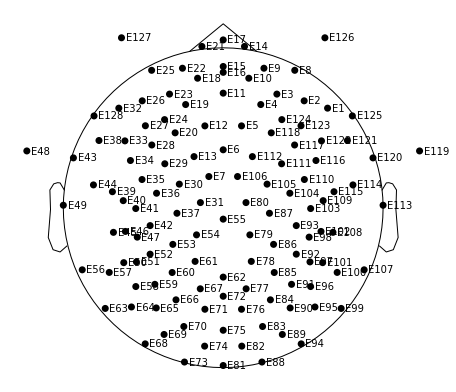

In [13]:
# plot1 = montage_hydrocel.plot()
_ = mne.channels.make_standard_montage('GSN-HydroCel-128').plot()

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


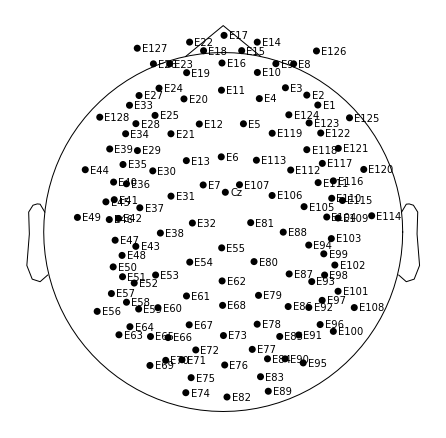

In [54]:
plot1 = gsn_200.plot()

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


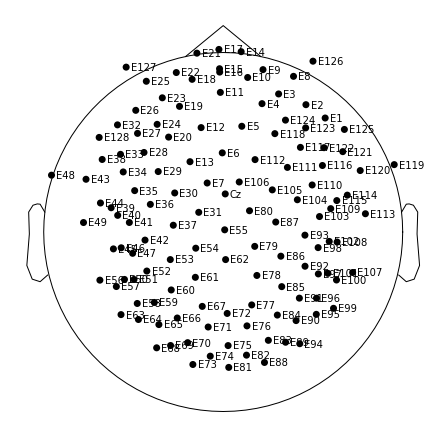

In [14]:
plot2 = gsn_HC.plot()

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


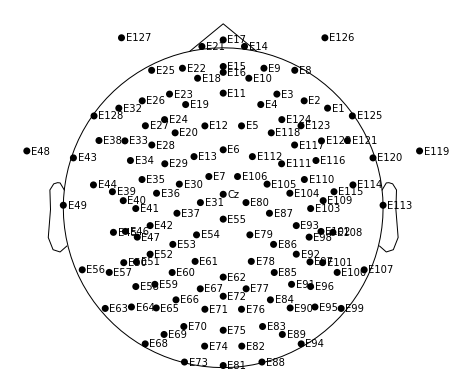

In [6]:
montage_hydrocel = mne.channels.make_standard_montage('GSN-HydroCel-129')
_ = montage_hydrocel.plot()

In [198]:
pos_dict = montage_hydrocel.get_positions()['ch_pos']
gsn_HC_standard_positions = np.stack([pos_dict[k] for k in pos_dict])

In [197]:
pos_dict = gsn_HC.get_positions()['ch_pos']
gsn_HC_custom_positions = np.stack([pos_dict[k] for k in pos_dict])

In [207]:
trans, resid, rank, s = np.linalg.lstsq(gsn_HC_custom_positions, gsn_HC_standard_positions, rcond=None)

In [218]:
gsn_HC.apply_trans(mne.transforms.Transform("unknown", "unknown", trans=trans), verbose=True)

ValueError: Transformation must be shape (4, 4) not (3, 3)